<a href="https://colab.research.google.com/github/wlsisl/ESAA_/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%BC%80%EB%9D%BC%EC%8A%A4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04. 모델 세부 설정

In [1]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터 로드
mnist=tf.keras.datasets.mnist

#load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

#데이터 정규화
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


## 4-1 초기값 설정

 dense 레이어는 기본 초기화 방법으로 Glorot Uniform 방법 사

In [4]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

문자열 초기화 방법을 HeNoramal로 변경하기위해 kernel_initializer 매개변수에 설

In [5]:
#문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


케라스에서 지원하는 자주 사용되는 초기화 목록

glorot_normal / glorot_uniform : 글로럿 초기화

lecun_normal / lecun_uniform : Yann Lecun 초기화

he_normal / he_uniform: He초기화

random_normal / random_uniform : 정규 분포


## 4-2 규제

과대적합을 해소하기 위해 규제 사용한다.

In [6]:
#기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [7]:
#L1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


## 4-3 드롭아웃

딥러닝의 문제는 과대적합의 문제가 큰 난제인데 드롭아웃이 이를 해결해줌.

노드들의 일부 신호를 임의로 삭제하게 되면, 모델이 쉽게 과대적합 되는 것을 방지할 수 있다.

In [8]:
#dropout 25% 비율 적용 (25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## 4-4 배치정규화

다음 층으로 데이터가 전달되기 전에 스케일을 조정한다.

In [9]:
#model A: Dense+ReLu
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
#model B: Dense+BatchNorm+ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

## 4-5 활성화함수

주로 relu 활성화 함수를 지정했다.

다른 것도 사용해보자.

In [11]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [12]:
#model C: Dense+BatchNorm+LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 (LeakyReLU, alpha=0.2) 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [13]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3008 - accuracy: 0.9121 - val_loss: 0.1490 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1383 - accuracy: 0.9583 - val_loss: 0.1216 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1005 - accuracy: 0.9701 - val_loss: 0.1061 - val_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0807 - accuracy: 0.9754 - val_loss: 0.0993 - val_accuracy: 0.9689
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0901 - val_accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0906 - val_accuracy: 0.9711
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0820 - val_accuracy

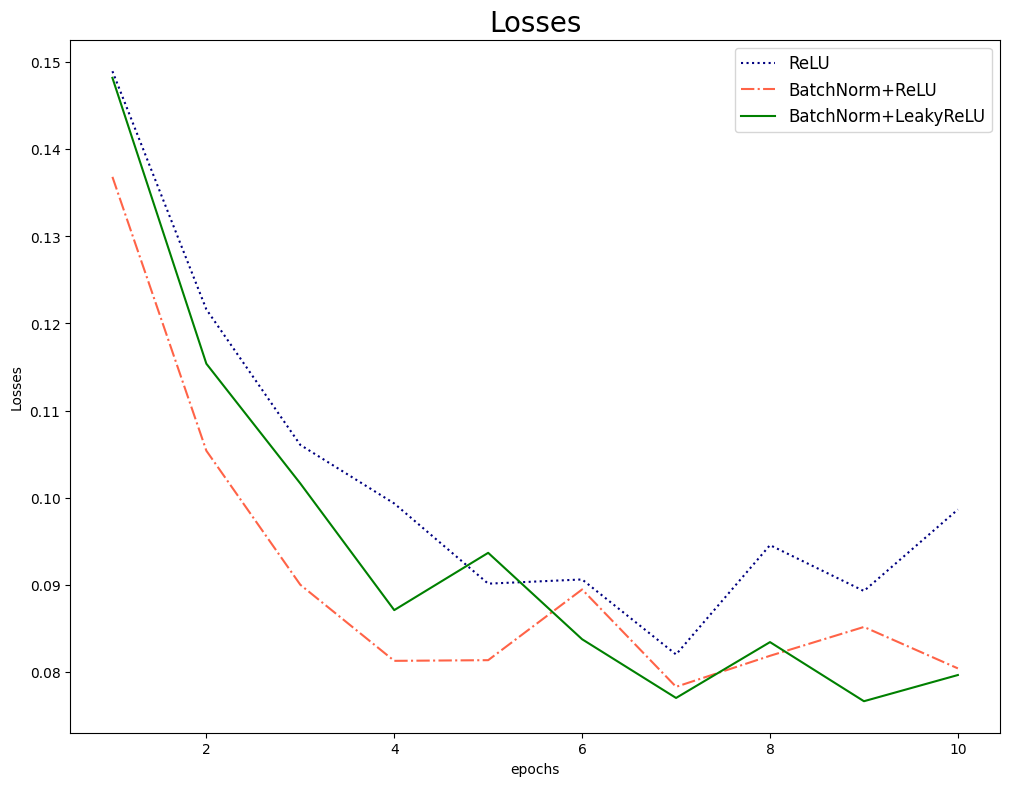

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

수렴속도 차이를 보는데, 별 차이가 크지 않다.

좀 더 복잡한 데이터셋이면 모델의 훈련 추이를 관찰할 수 있음.

## 6. 모델 저장 및 불러오기

## 6-1 모델 저장 

In [17]:
from google.colab import drive
drive.mount('/content/mydrive')

#모델명을 h5 포맷으로 저장
model_b.save('/content/mydrive/MyDrive/ESAA_data/h5-model.h5')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


## 6-2 복원

In [18]:
#모델 복원
h5_model=tf.keras.models.load_model('/content/mydrive/MyDrive/ESAA_data/h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

복원이 잘 되었는지 검증셋을 evaluate함수에 대입해 손실 함수와 평가지표를 계산한다.

In [19]:
#모델 검증
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08039, acc: 0.97710


In [20]:
#모델을 SavedModel 포맷으로 저장
model_b.save('/content/mydrive/MyDrive/ESAA_data/saved-model')

In [21]:
#모델 복원
saved_model=tf.keras.models.load_model('/content/mydrive/MyDrive/ESAA_data/saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [22]:
#모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08039, acc: 0.97710
saved_model] loss: 0.08039, acc: 0.97710


## 07. 복잡한 모델 생성

## 7-1 함수형 api

함수의 입력 매개변수를 여러 개 갖는 다중입력, 함수의 return값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능하다.

* Sequential API를 사용하는 경우 단방향의 Sequential모델만 구현할 수 있다는 제약이 있다.

<먼저 input 레이어 정의>

In [23]:
import tensorflow as tf

#모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [24]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary() #name 위에 설정하면 summary에 출력됨.ㅎ

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


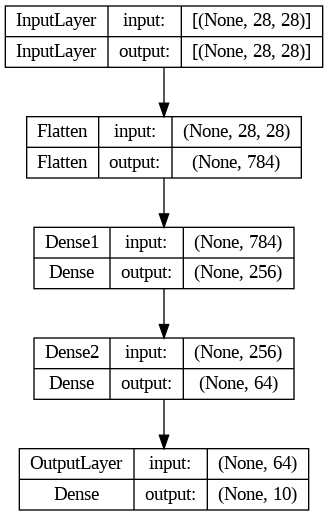

In [25]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

함수형 api로 생성한 모델도 Sequential api로 생성한 모델과 동일한 방식으로 훈련할 수 있다.

In [26]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2133 - accuracy: 0.9364
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0869 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0596 - accuracy: 0.9813
Functional Model] loss: 0.06942, acc: 0.97780


## 7-2. 모델 서브클래싱

텐서플로 케라스는 모델 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있다.

이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다.

Model Subclassing으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현한다.

In [27]:

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x


call()함수는 fit 메서드가 호출되어 훈련하는 경우 호출될 함수이다.

해당 함수 내부에서는 모델의 입력, 출력, 순전파를 정의한다.

In [28]:
#모델 생성
mymodel=MyModel()

#모델의 이름 설정
mymodel._name='subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


input shape가 지정되어야 summary로 요약이 가능하다.

In [29]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2161 - accuracy: 0.9356
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0883 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0582 - accuracy: 0.9814
Subclassing Model] loss: 0.08241, acc: 0.97580


## 7-3. 서브클래싱 모델 파라미터를 활용한 생성

[Model subclassing의 장점]

* 생성자 파라미터로 모델 내부 레이어의 하이퍼 파라미터를 지정할 수 있음

\

모델의 생성자 파라미터를 추가해 동적으로 레이어의 유닛 개수를 초기화하는 예제


In [30]:
class MyModel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  #class overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

모델의 생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 dense 레이어의 유닛 개수를 계산하여 설정한다.

In [31]:
#모델 생성
mymodel=MyModel(256, 10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [32]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2087 - accuracy: 0.9385
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0854 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0585 - accuracy: 0.9819
Subclassing Model w.parameters] loss: 0.07458, acc: 0.97710
